C:\Users\Almazt\AppData\Local\Temp\ipykernel_19044\1872624195.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r"C:\Users\Almazt\OneDrive - Ethiopian Airlines\Desktop\10 Academy\Rossmann Pharmaceuticals\Week-4\data\raw\train_cleaned_data.csv")


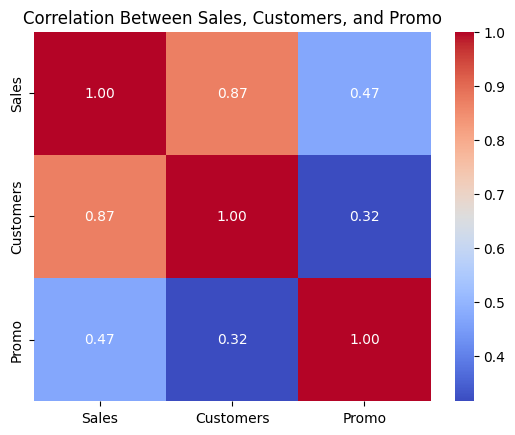

In [20]:
# 1.1. Correlation Analysis
# Explore the relationship between Sales, Customers, and promo.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Load datasets (train.csv, test.csv, etc.) into Pandas dataframes.

train = pd.read_csv(r"C:\Users\Almazt\OneDrive - Ethiopian Airlines\Desktop\10 Academy\Rossmann Pharmaceuticals\Week-4\data\raw\train_cleaned_data.csv")

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Ensure 'Promo' column is present
if 'Promo' not in train.columns:
	raise KeyError("Column 'Promo' not found in the dataframe")

# Compute correlation
correlation_matrix = train[['Sales', 'Customers', 'Promo']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sales, Customers, and Promo")
plt.show()

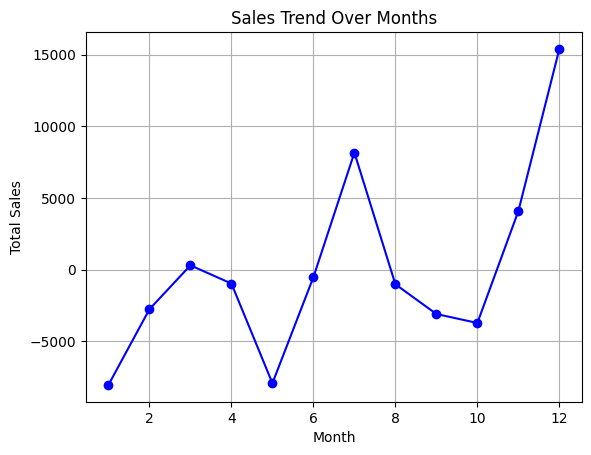

In [21]:
# # 1.2. Seasonality
# Group sales data by month and year to observe trends over time.

# Ensure 'Date' is a datetime object
train['Date'] = pd.to_datetime(train['Date'])

# Extract 'Month' and 'Year'
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

# Group by Month to find trends
monthly_sales = train.groupby('Month')['Sales'].sum()

# Line plot for monthly sales
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Sales Trend Over Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

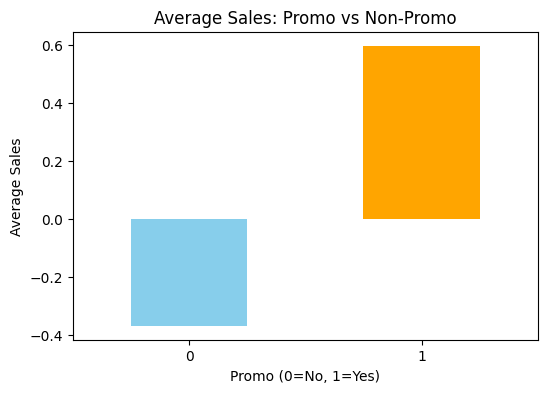

C:\Users\Almazt\AppData\Local\Temp\ipykernel_19044\178182033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=train, palette="Set2")


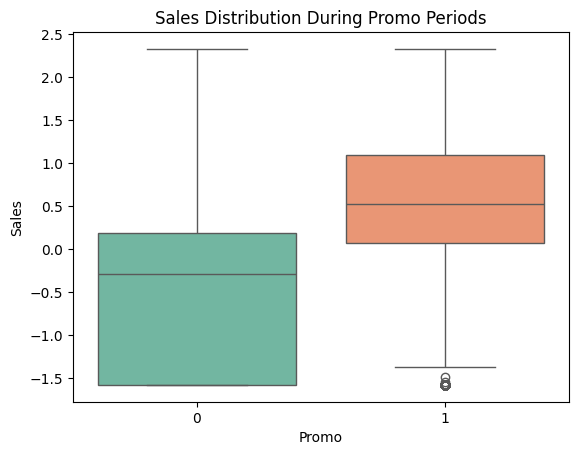

In [22]:
# 1.3. Promo Effects
# Compare sales during Promotional periods versus non-promotional periods.

# Average sales for Promo (1) and No Promo (0)
promo_sales = train.groupby('Promo')['Sales'].mean()

# Bar plot
promo_sales.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6, 4))
plt.title("Average Sales: Promo vs Non-Promo")
plt.xlabel("Promo (0=No, 1=Yes)")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

# Boxplot to visualize distribution
sns.boxplot(x='Promo', y='Sales', data=train, palette="Set2")
plt.title("Sales Distribution During Promo Periods")
plt.show()

C:\Users\Almazt\AppData\Local\Temp\ipykernel_19044\4175484907.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_train = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_train.csv")


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

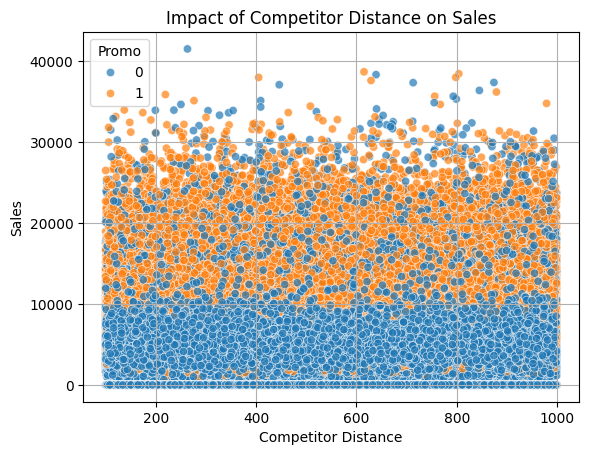

' merged_test = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_test.csv")\n\nprint(merged_test.head())\n\nmerged_test[\'CompetitionDistance\'] = np.random.randint(100, 1000, size=len(train))\n\n# Scatter plot\nsns.scatterplot(data=merged_test, x=\'CompetitionDistance\', y=\'Sales\', hue=\'Promo\', alpha=0.7)\nplt.title("Impact of Competitor Distance on Sales")\nplt.xlabel("Competitor Distance")\nplt.ylabel("Sales")\nplt.grid()\nplt.show() '

In [41]:
# 1.4. Competitor Effect
# Analyze the impact of competitor distance on sales.

# Add a dummy 'Competitor_Distance' column for demonstration purposes
import numpy as np

# Load datasets (merged_result_train.csv, merged_result_test.csv, etc.) into Pandas dataframes.

merged_train = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_train.csv")

print(merged_train.head())

merged_train['CompetitionDistance'] = np.random.randint(100, 1000, size=len(train))

# Scatter plot
sns.scatterplot(data=merged_train, x='CompetitionDistance', y='Sales', hue='Promo', alpha=0.7)
plt.title("Impact of Competitor Distance on Sales")
plt.xlabel("Competitor Distance")
plt.ylabel("Sales")
plt.grid()
plt.show()

""" merged_test = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_test.csv")

print(merged_test.head())

merged_test['CompetitionDistance'] = np.random.randint(100, 1000, size=len(train))

# Scatter plot
sns.scatterplot(data=merged_test, x='CompetitionDistance', y='Sales', hue='Promo', alpha=0.7)
plt.title("Impact of Competitor Distance on Sales")
plt.xlabel("Competitor Distance")
plt.ylabel("Sales")
plt.grid()
plt.show() """

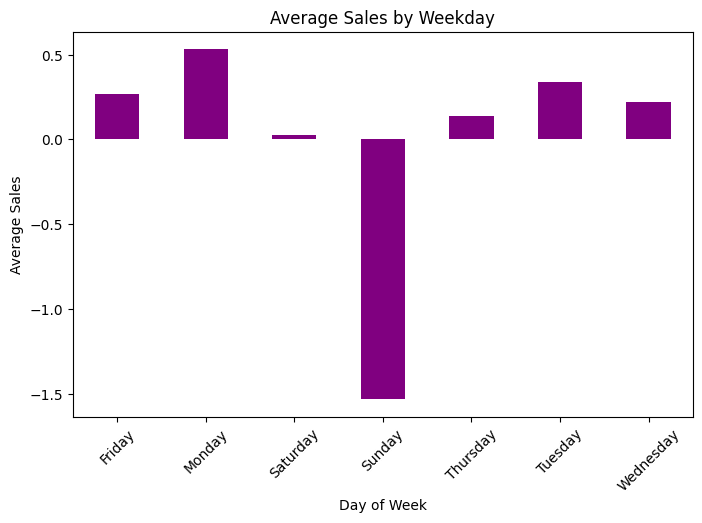

In [42]:
# 2. Additional Insights
# 2.1. Customer Purchase Patterns on Weekdays
# Identify which days customers prefer for shopping.

# Extract weekday
train['Weekday'] = train['Date'].dt.day_name()

# Average sales by weekday
weekday_sales = train.groupby('Weekday')['Sales'].mean()

# Bar plot
weekday_sales.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title("Average Sales by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()

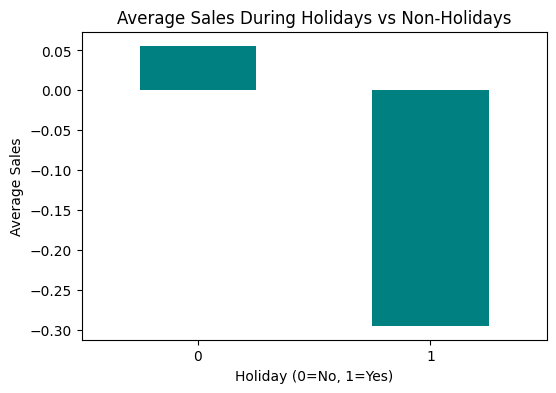

In [44]:
# 2.2. Special Events or Holiday Behavior
# Analyze how sales vary during holidays.

# Create 'Holiday' column based on 'StateHoliday'
train['Holiday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Sales during holidays
holiday_sales = train.groupby('Holiday')['Sales'].mean()

# Bar plot
holiday_sales.plot(kind='bar', color='teal', figsize=(6, 4))
plt.title("Average Sales During Holidays vs Non-Holidays")
plt.xlabel("Holiday (0=No, 1=Yes)")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

C:\Users\Almazt\AppData\Local\Temp\ipykernel_19044\3012955120.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_train = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_train.csv")


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

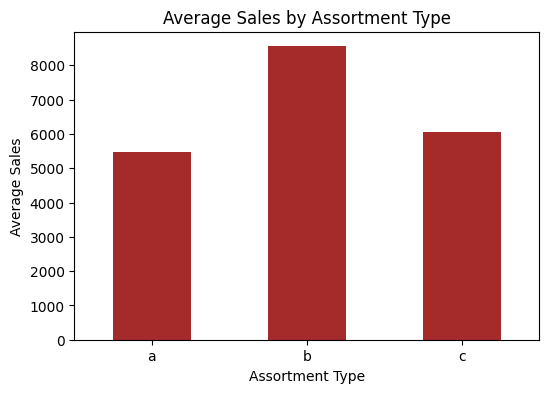

In [52]:
# 2.3. Store Performance by Assortment Type
# Compare store assortment type impact on sales.

merged_train = pd.read_csv(r"C:/Users/Almazt/OneDrive - Ethiopian Airlines/Desktop/10 Academy/Rossmann Pharmaceuticals/Week-4/data/raw/merged_result_train.csv")

print(merged_train.head())

# Ensure 'Assortment' column is present
if 'Assortment' not in merged_train.columns:
	raise KeyError("Column 'Assortment' not found in the dataframe")

# Group by assortment type
assortment_sales = merged_train.groupby('Assortment')['Sales'].mean()

# Bar plot
assortment_sales.plot(kind='bar', color='brown', figsize=(6, 4))
plt.title("Average Sales by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

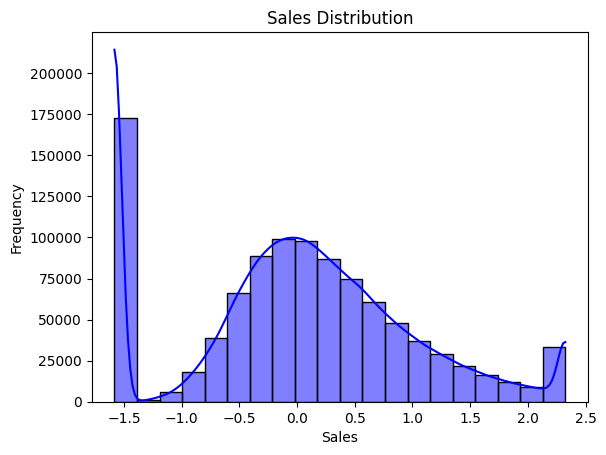

In [53]:
# 3. Data Visualization
# 3.1. Distribution of Sales
# Understand how sales values are distributed across stores

sns.histplot(train['Sales'], kde=True, bins=20, color='blue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

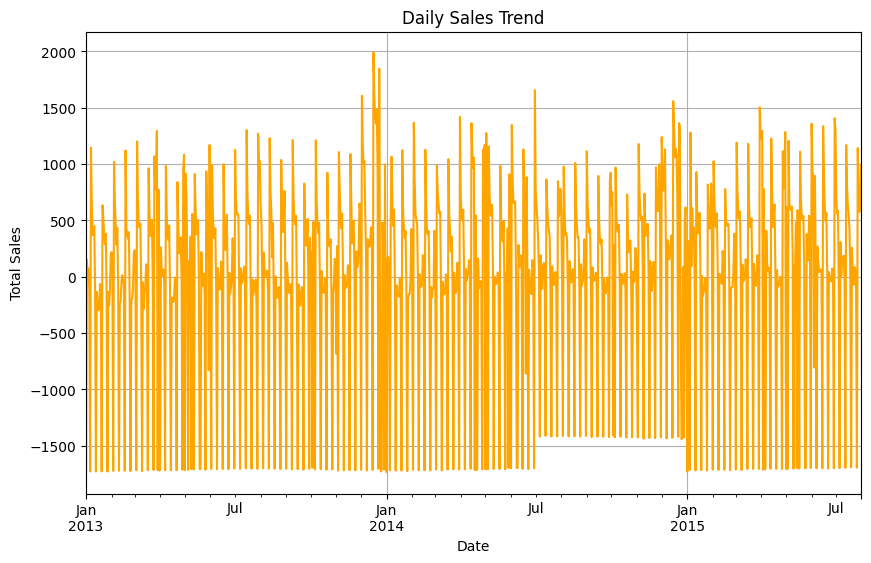

In [54]:
# 3.2. Trends Over Time
# Visualize daily sales trends.

# Group by Date to get daily sales
daily_sales = train.groupby('Date')['Sales'].sum()

# Line plot
daily_sales.plot(kind='line', color='orange', figsize=(10, 6))
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

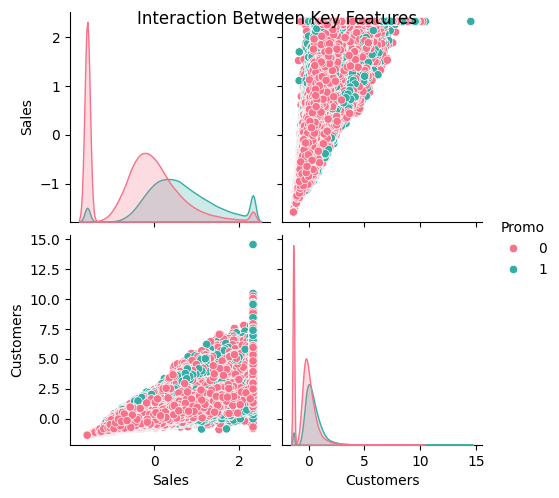

In [56]:
# 3.3. Feature Interactions
# Explore relationships between multiple features using pairplots

sns.pairplot(train[['Sales', 'Customers', 'Promo']], hue='Promo', palette='husl')
plt.suptitle("Interaction Between Key Features")
plt.show()

In [ ]:
logger.info("EDA completed successfully.")